In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math

In [4]:
from sklearn.datasets import load_digits

In [98]:
l_d = load_digits()

In [99]:
l_d.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [100]:
l_d.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [101]:
l_d.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

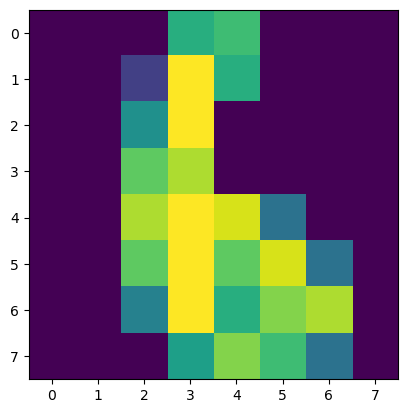

In [102]:
plt.imshow(l_d.images[88]);

In [103]:
l_d.target[88]

6

In [104]:
from sklearn.linear_model import SGDClassifier
SGDclf = SGDClassifier (random_state = 42)

In [105]:
X= l_d.data
Y = l_d.target 

In [106]:
SGDclf.fit(X,Y)

SGDClassifier(random_state=42)

In [107]:
SGDclf.score(X,Y)

0.9699499165275459

In [108]:
pred = SGDclf.predict(X)

In [109]:
pred

array([0, 1, 2, ..., 8, 9, 8])

In [110]:
cm = confusion_matrix(Y, pred)
cm
# Наиболее часто воспринимаем 1 как 9 

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 164,   1,   1,   0,   0,   0,   0,  14,   2],
       [  0,   0, 176,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 166,   0,   5,   0,   1,   8,   3],
       [  0,   1,   0,   0, 174,   1,   1,   1,   1,   2],
       [  0,   0,   0,   0,   0, 180,   0,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0, 180,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 175,   1,   3],
       [  0,   1,   0,   0,   0,   0,   0,   0, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3, 177]], dtype=int64)

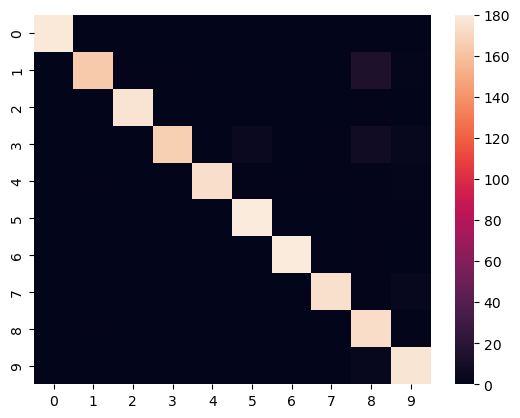

In [111]:
sns.heatmap(cm);

In [112]:
SGDclf.decision_function([X[149]])

array([[-1620.5704734 , -2737.45016992, -4068.41238954, -1372.88101862,
        -3719.98932766,  -759.50902105, -4253.04399849, -2968.62984857,
         -600.77843692,   824.98806156]])

In [113]:
SGDclf.predict([X[88]])

array([6])

In [114]:
X[88]

array([ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,
        0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
       12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 15.,  6.,  0.,
        0.,  0.,  0., 12., 16., 12., 15.,  6.,  0.,  0.,  0.,  7., 16.,
       10., 13., 14.,  0.,  0.,  0.,  0.,  9., 13., 11.,  6.,  0.])

In [115]:
from sklearn.multiclass import OneVsOneClassifier 

In [116]:
ovoSGD = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovoSGD.fit(X,Y)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [117]:
ovoSGD.decision_function([X[88]])

array([[ 1.6666873 ,  8.33332298,  4.66680841,  3.66668241,  6.33328268,
         2.66668994,  9.33332819,  0.66667696,  7.33332611, -0.33332808]])

In [118]:
ovoSGD.predict([X[88]])

array([6])

In [119]:
ovoSGD.estimators_

(SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassi

In [120]:
pred = ovoSGD.predict(X)

In [121]:
precision_score(Y,pred, average = 'macro'), recall_score(Y,pred, average = 'macro'), f1_score(Y,pred, average = 'macro') 

(1.0, 1.0, 1.0)

In [122]:
# Вывод. Не совсем понял как это работает. Но скорей всего лучше справился OvO

In [5]:
data = pd.read_csv('churn-bigml-80 .csv')

In [6]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [8]:
data.drop(columns = ['State'], axis = 1, inplace = True)

In [12]:
data["Voice mail plan"] = data["Voice mail plan"].map({"Yes": 1, "No": 0})

In [14]:
data["International plan"] = data["International plan"].map({"Yes": 1, "No": 0})

In [16]:
data["Churn"] = data["Churn"].map({"True": 1, "False": 0})

In [18]:
data = data.replace(np.nan, 0)

In [19]:
data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0.0
2662,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0.0
2663,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0.0
2664,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0.0


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
mm = MinMaxScaler()

In [25]:
data_mm = mm.fit_transform(data)

In [26]:
data_mm

array([[0.52479339, 0.06862745, 0.        , ..., 0.5       , 0.11111111,
        0.        ],
       [0.43801653, 0.06862745, 0.        , ..., 0.68518519, 0.11111111,
        0.        ],
       [0.56198347, 0.06862745, 0.        , ..., 0.60925926, 0.        ,
        0.        ],
       ...,
       [0.2768595 , 0.06862745, 0.        , ..., 0.47962963, 0.33333333,
        0.        ],
       [0.11157025, 1.        , 0.        , ..., 0.70555556, 0.22222222,
        0.        ],
       [0.30165289, 0.06862745, 0.        , ..., 0.68518519, 0.        ,
        0.        ]])

In [27]:
from sklearn.linear_model import LogisticRegression 
logReg = LogisticRegression()

In [28]:
 logReg()

TypeError: 'LogisticRegression' object is not callable